In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from scipy import io
from numpy import genfromtxt
from scipy.optimize import curve_fit
from pandas import read_csv
import pandas as pd

/Users/kunwoosmac/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Q1
## Part1

In [2]:
# input vector
x = np.linspace(-20, 20, 41)
np.random.seed(0) 
# set random seed to get same a0, a1, and n everytime.
a0 = round(np.random.uniform(1, 5), 2)
a1 = round(np.random.uniform(0.5, 2.0), 2)
print("a0 : {}, a1 : {}".format(a0, a1))

a0 : 3.2, a1 : 1.57


In [3]:
n = 4*(np.random.rand(41,) - 0.5)
print("vector n :", n.ravel())

vector n : [ 0.4110535   0.17953273 -0.3053808   0.58357645 -0.24965115  1.567092
  1.85465104 -0.46623392  1.16690015  0.11557968  0.27217824  1.70238655
 -1.71585577 -1.6514828  -1.91912641  1.33047938  1.112627    1.48004859
  1.91447337  1.19663426 -0.15408255  1.12211671 -1.5269023   0.55968409
 -1.42658685  1.77867567  0.08739329 -0.34135224 -0.94177755  1.09693476
 -0.17539867  0.2737358  -1.9248408   0.47054199  0.44838289  0.46773599
  1.77499231  0.7272812  -0.5619684  -0.25187218  0.79052478]


- This creates random float between -2 and 2 because np.random.rand returns random number between 0 and 1. So if you subtract 0.5, the number is between -0.5 and 0.5, which is then multiplied by 4, making it between -2 and 2.
- However for my code, I would like to use the same random vector ni everytime I run my code to check the difference between linear fitting and polynomial fitting. So I will use np.random.seed(0)

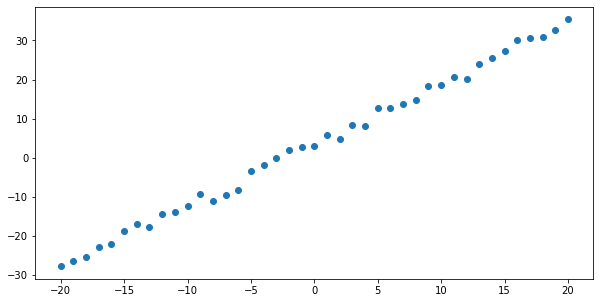

In [4]:
y = a0 + a1*x + n
plt.figure(figsize = (10,5))
plt.scatter(x,y)

Real a0 : 3.2, a0 from linear regression : 3.4651878054818255, error : 8.287 %
Real a1 : 1.57, a1 from linear regression : 1.564789866922695, error : 0.332 %


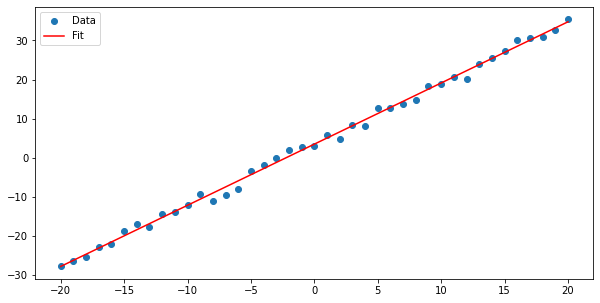

In [5]:
x = x.reshape(len(x), 1); y = y.reshape(len(y), 1)
reg = LinearRegression().fit(x,y)

reg_a0 = reg.intercept_[0]
reg_a1 = reg.coef_[0][0]
print("Real a0 : {}, a0 from linear regression : {}, error : {} %".\
      format(a0, reg_a0, round(100*(abs(a0 - reg_a0)/a0),3)))
print("Real a1 : {}, a1 from linear regression : {}, error : {} %".\
      format(a1, reg_a1, round(100*(abs(a1 - reg_a1)/a1),3)))

plt.figure(figsize = (10,5))
plt.scatter(x, y, label = 'Data')
plt.plot(x, reg.predict(x), c = 'r', label = "Fit")
plt.legend()

- Since I set the random seed, it is not a generalized error, but the error was 8.3% for a0 and 0.3% for a1

## Part 2

In [6]:
np.random.seed(1)
a0 = round(np.random.uniform(1, 5), 2)
a1 = round(np.random.uniform(0.5, 2.0), 2)
a2 = round(np.random.uniform(0.1, 0.5), 2)
print("a0 : {}, a1 : {}, a2 : {}".format(a0, a1, a2))

a0 : 2.67, a1 : 1.58, a2 : 0.1


In [7]:
n = 20*(np.random.rand(41,) - 0.5)
print("vector n :", n.ravel())

vector n : [-3.95334855 -7.06488218 -8.1532281  -6.27479577 -3.08878546 -2.06465052
  0.77633468 -1.61610971  3.70439001 -5.91095501  7.56234873 -9.45224814
  3.4093502  -1.65390395  1.17379657 -7.19226123 -6.03797022  6.01489137
  9.36523151 -3.73151644  3.84645231  7.52778305  7.89213327 -8.29911577
 -9.21890434 -6.60339161  7.56285007 -8.03306332 -1.5778475   9.1577906
  0.6633057   3.83754228 -3.68968738  3.73001855  6.69251344 -9.63423445
  5.0028863   9.77722178  4.96331309 -4.39112016  5.78558657]


(41,) (41,)


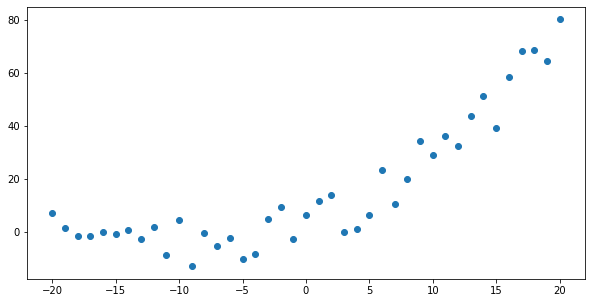

In [8]:
x = np.linspace(-20, 20, 41)
y = a0 + a1*x + a2*x**2 + n
print(x.shape, y.shape)
plt.figure(figsize = (10,5))
plt.scatter(x,y)

Real a0 : 2.67, a0 from linear regression : 2.9883461672155924, error : 11.923 %
Real a1 : 1.58, a1 from linear regression : 1.745364138771658, error : 10.466 %
Real a2 : 0.1, a2 from linear regression : 0.09612395948111807, error : 3.876 %


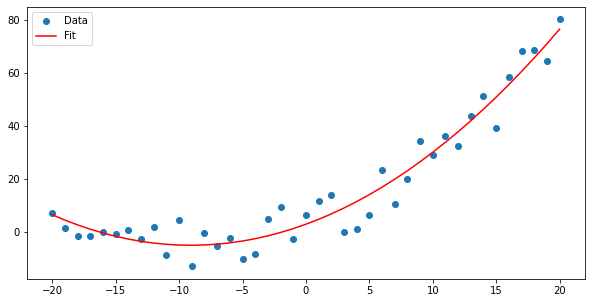

In [9]:
#Create an X matrix with the proper shape for LinearRegression
X = np.empty((len(x),2))
X[:,0]= x
X[:,1] = x**2
# if you provide linear regression with a metrix containing x and x^2 , it automatically fits into quadratic

#Fit a model
reg = LinearRegression().fit(X, y)

reg_a0 = reg.intercept_
reg_a1 = reg.coef_[0]
reg_a2 = reg.coef_[1]

print("Real a0 : {}, a0 from linear regression : {}, error : {} %".\
      format(a0, reg_a0, round(100*(abs(a0 - reg_a0)/a0),3)))
print("Real a1 : {}, a1 from linear regression : {}, error : {} %".\
      format(a1, reg_a1, round(100*(abs(a1 - reg_a1)/a1),3)))
print("Real a2 : {}, a2 from linear regression : {}, error : {} %".\
      format(a2, reg_a2, round(100*(abs(a2 - reg_a2)/a2),3)))

plt.figure(figsize = (10,5))
plt.scatter(x,y, label = "Data")
plt.plot(x,reg.predict(X),color='red', label = 'Fit')
plt.legend()

- error was 11.9% for a0, 10.5% for a1, and 3.9% for a2

## Part 3

<class 'dict'>


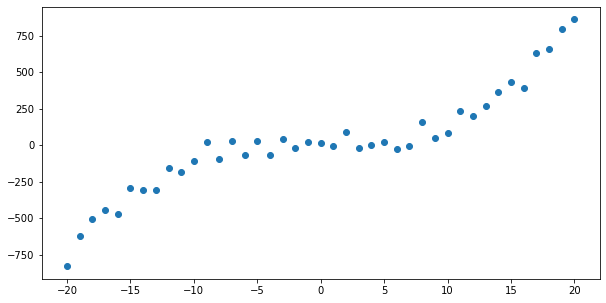

In [30]:
data = io.loadmat("/Users/kunwoosmac/Desktop/2022_Fall/computational mechanics/data.mat")
x, y = data['x'], data['y']
plt.figure(figsize = (10,5))
plt.scatter(x,y)

- Looking at the plot, it seems like cubic function will fit the best.
- Try 4th and 5th to check if they are better fit.

All three degrees have similar plot


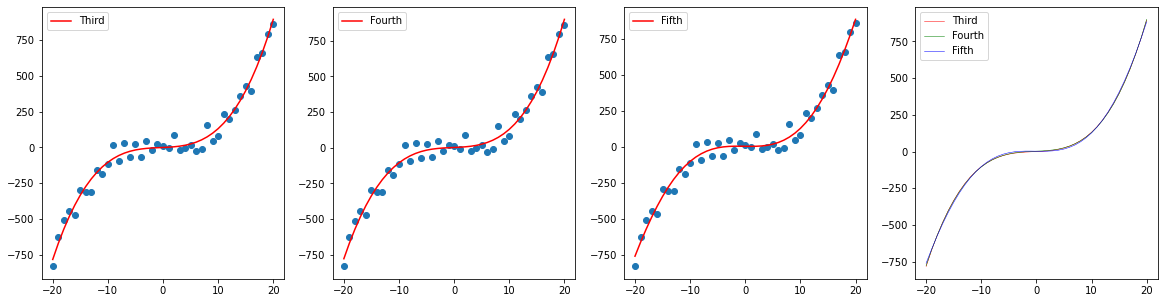

In [11]:
x = x.reshape(41,1);y = y.reshape(41,1)
fig, ax = plt.subplots(1, 4, figsize = (20,5))

# Third order
X3 = np.empty((len(x), 3))
X3[:,0] = x[:,0]
X3[:,1] = x[:,0] ** 2
X3[:,2] = x[:,0] ** 3
reg3 = LinearRegression().fit(X3, y)
ax[0].scatter(x,y)
ax[0].plot(x, reg3.predict(X3), c = 'r', label = 'Third')
ax[0].legend()

# Fourth order
X4 = np.empty((len(x), 4))
X4[:,0] = x[:,0]
X4[:,1] = x[:,0] ** 2
X4[:,2] = x[:,0] ** 3
X4[:,3] = x[:,0] ** 4
reg4 = LinearRegression().fit(X4, y)
ax[1].scatter(x,y)
ax[1].plot(x, reg4.predict(X4), c = 'r', label = 'Fourth')
ax[1].legend()

# Fifth order
X5 = np.empty((len(x), 5))
X5[:,0] = x[:,0]
X5[:,1] = x[:,0] ** 2
X5[:,2] = x[:,0] ** 3
X5[:,3] = x[:,0] ** 4
X5[:,4] = x[:,0] ** 5
reg5 = LinearRegression().fit(X5, y)
ax[2].scatter(x,y)
ax[2].plot(x, reg5.predict(X5), c = 'r', label = 'Fifth')
ax[2].legend()

ax[3].plot(x, reg3.predict(X3), c = 'r', label = 'Third', linewidth=0.5)
ax[3].plot(x, reg4.predict(X4), c = 'g', label = 'Fourth', linewidth=0.5)
ax[3].plot(x, reg5.predict(X5), c = 'b', label = 'Fifth',linewidth=0.5)
ax[3].legend()

print("All three degrees have similar plot")

In [12]:
reg3_a = reg3.coef_[0]
reg4_a = reg4.coef_[0]
reg5_a = reg5.coef_[0]

print("Third order")
print("a1 : {}, a2 : {}, a3 : {}".format(reg3_a[0],reg3_a[1],reg3_a[2]))
print("Fourth order")
print("a1 : {}, a2 : {}, a3 : {}, a4 : {}".format(reg4_a[0],reg4_a[1],reg4_a[2],reg4_a[3]))
print("Fifth order")
print("a1 : {}, a2 : {}, a3 : {}, a4 : {}, a5 : {}".format(reg5_a[0],reg5_a[1],reg5_a[2],reg5_a[3], reg5_a[4]))

Third order
a1 : 1.6724261817040962, a2 : 0.1409852633667764, a3 : 0.10069415185836769
Fourth order
a1 : 1.6724261817040993, a2 : 0.08195286704056526, a3 : 0.10069415185836766, a4 : 0.0001643048804308156
Fifth order
a1 : -0.5992042372377382, a2 : 0.08195286704056262, a3 : 0.1260454314421913, a4 : 0.00016430488043081334, a5 : -5.451888082542988e-05


- If we check the a values from the regression, we can see that coefficients in higher degree terms are getting exponentially smaller. 
- That is why degree over 3 is not making much difference, only making the problem more complex.
- Thus cubic function is fitting the graph the best

# Q2

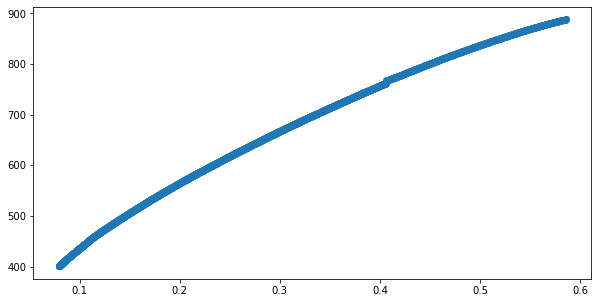

In [13]:
T = genfromtxt("/Users/kunwoosmac/Desktop/2022_Fall/computational mechanics/stressstrain.csv", delimiter = ',')
e = T[:,0] ; s = T[:,1]
e = e.reshape(-1,); s = s.reshape(-1,)
plt.figure(figsize = (10,5))
plt.scatter(e,s)

K : 1106.5310950312714
eta : 0.41346593521554587


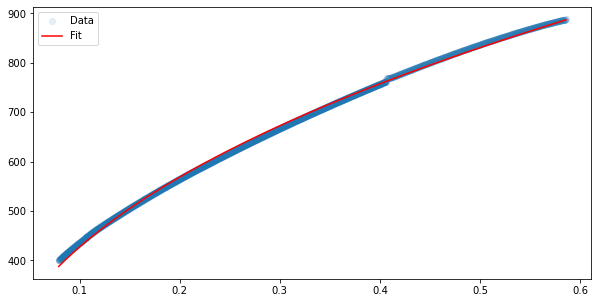

In [14]:
# Function to calculate the exponential with constants a and b
def exponential(e, k, eta):
    return k*e**(eta)

# Fit the dummy exponential data
pars, _ = curve_fit(f = exponential, xdata = e, ydata = s, p0 = [-100, 0])

print('K :', pars[0])
print('eta :', pars[1])

plt.figure(figsize = (10,5))
plt.scatter(e, s, alpha = 0.1, label = "Data")
plt.plot(e, exponential(e,pars[0],pars[1]), c = 'r', label = "Fit")
plt.legend()

# Q3

## Part 1

In [31]:
df = read_csv("/Users/kunwoosmac/Desktop/2022_Fall/computational mechanics/Keeling-NH.csv", header = None)
dfc = df.drop(df[df[4]<0].index, axis = 0, inplace = False)
data = df.values
datac = dfc.values
x, y = data[:,3], data[:,4]
xc, yc = datac[:,3], datac[:,4]

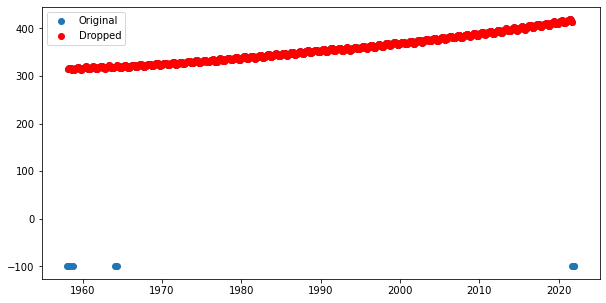

In [17]:
# Check if it has been properly dropped
plt.figure(figsize = (10,5))
plt.scatter(x,y,label = 'Original')
plt.scatter(xc,yc,c='r',label = "Dropped")
plt.legend()

## Part 2

(300.0, 450.0)

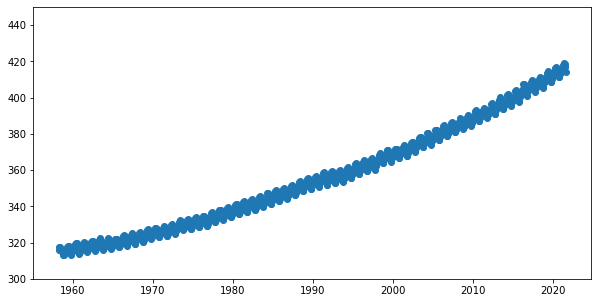

In [18]:
plt.figure(figsize = (10,5))
plt.scatter(xc,yc)
plt.ylim(300,450)

## Part 3

(2015.0, 2020.0)

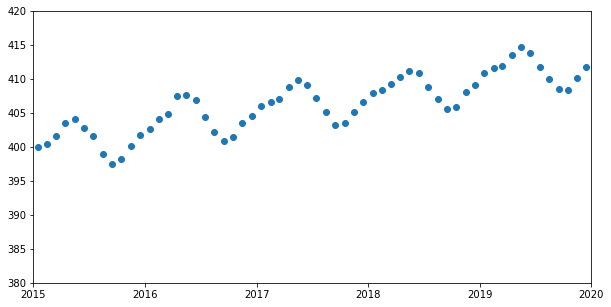

In [19]:
plt.figure(figsize = (10,5))
plt.scatter(xc,yc)
plt.ylim(380,420)
plt.xlim(2015,2020)

## Part 4 & 5

In [20]:
# Define models
def linear(xc, a0, a1):
    return a0 + a1*xc
def quadratic(xc, a0, a1, a2):
    return a0 + a1*xc + a2*xc**2
def nonlinear(xc, a0, a1, a2, a3, a4):
    return a0 + a1*xc + a2*xc**2 + a3*np.sin(a4-xc)

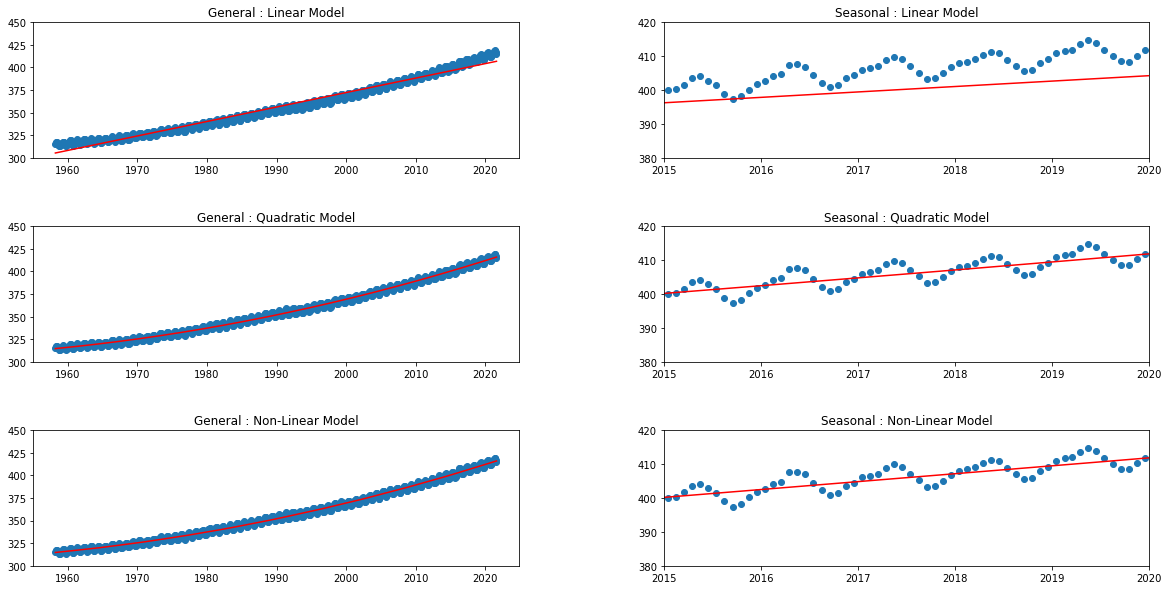

In [21]:
# Fit the data into models
pars_lin, _ = curve_fit(linear, xdata = xc, ydata = yc, p0 = [10, 10])
pars_quad, _ = curve_fit(quadratic, xdata = xc, ydata = yc, p0 = [10, 10, 10])
pars_nonlin, _ = curve_fit(nonlinear, xdata = xc, ydata = yc, p0 = [10, 10, 10, 10, 10])

# Plot the data
fig, ax = plt.subplots(3,2, figsize = (20,10))

ax[0,0].title.set_text("General : Linear Model")
ax[0,0].scatter(xc,yc)
ax[0,0].set_ylim(300,450)
ax[0,0].plot(xc, linear(xc,pars_lin[0],pars_lin[1]), c = 'r')

ax[0,1].title.set_text("Seasonal : Linear Model")
ax[0,1].scatter(xc,yc)
ax[0,1].set_ylim(380,420)
ax[0,1].set_xlim(2015,2020)
ax[0,1].plot(xc, linear(xc,pars_lin[0],pars_lin[1]), c = 'r')

ax[1,0].title.set_text("General : Quadratic Model")
ax[1,0].scatter(xc,yc)
ax[1,0].set_ylim(300,450)
ax[1,0].plot(xc, quadratic(xc,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r')

ax[1,1].title.set_text("Seasonal : Quadratic Model")
ax[1,1].scatter(xc,yc)
ax[1,1].set_ylim(380,420)
ax[1,1].set_xlim(2015,2020)
ax[1,1].plot(xc, quadratic(xc,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r')

ax[2,0].title.set_text("General : Non-Linear Model")
ax[2,0].scatter(xc,yc)
ax[2,0].set_ylim(300,450)
ax[2,0].plot(xc, nonlinear(xc,pars_nonlin[0],pars_nonlin[1],pars_nonlin[2],pars_nonlin[3],pars_nonlin[4]), c = 'r')

ax[2,1].title.set_text("Seasonal : Non-Linear Model")
ax[2,1].scatter(xc,yc)
ax[2,1].set_ylim(380,420)
ax[2,1].set_xlim(2015,2020)
ax[2,1].plot(xc, nonlinear(xc,pars_nonlin[0],pars_nonlin[1],pars_nonlin[2],pars_nonlin[3],pars_nonlin[4]), c = 'r')

fig.subplots_adjust(wspace=0.3, hspace=0.5)

- Looking at seasonal details, linear or quadratic model is clearly not enough.
- I suposed that non-linear model, which contains sin, would have period and thus be a good fit.
- But the truth is that it is not a good model neither.
- The problem seems to be in the fact that the cycle of sin term can't be changed, so it can't fit the actual data.

## Addition to part 4 & 5 : Try Modification (My own model)
- Received the basic concept of using Quadratic Base + Sinusoidal Seasonal Trends
- Looking at the former plots, the data had a trend of having about one sin cycle per a year(it is seasonal)
- Changed the sin part to take the year data multipied by 2*np.pi
- added a4 for moving graphs horizontaly and a3 to optimize the proper magnitude

In [22]:
def my_model(xc, a0, a1, a2, a3, a4):
    year = np.floor(xc)
    decimals = xc - year
    return a0 + a1*xc + a2*xc**2 + a3*np.sin(2*np.pi*xc + a4)

In [23]:
pars_my, _ = curve_fit(my_model, xdata = xc, ydata = yc, p0 = [10, 10, 10, 10, 10], maxfev = 100000)

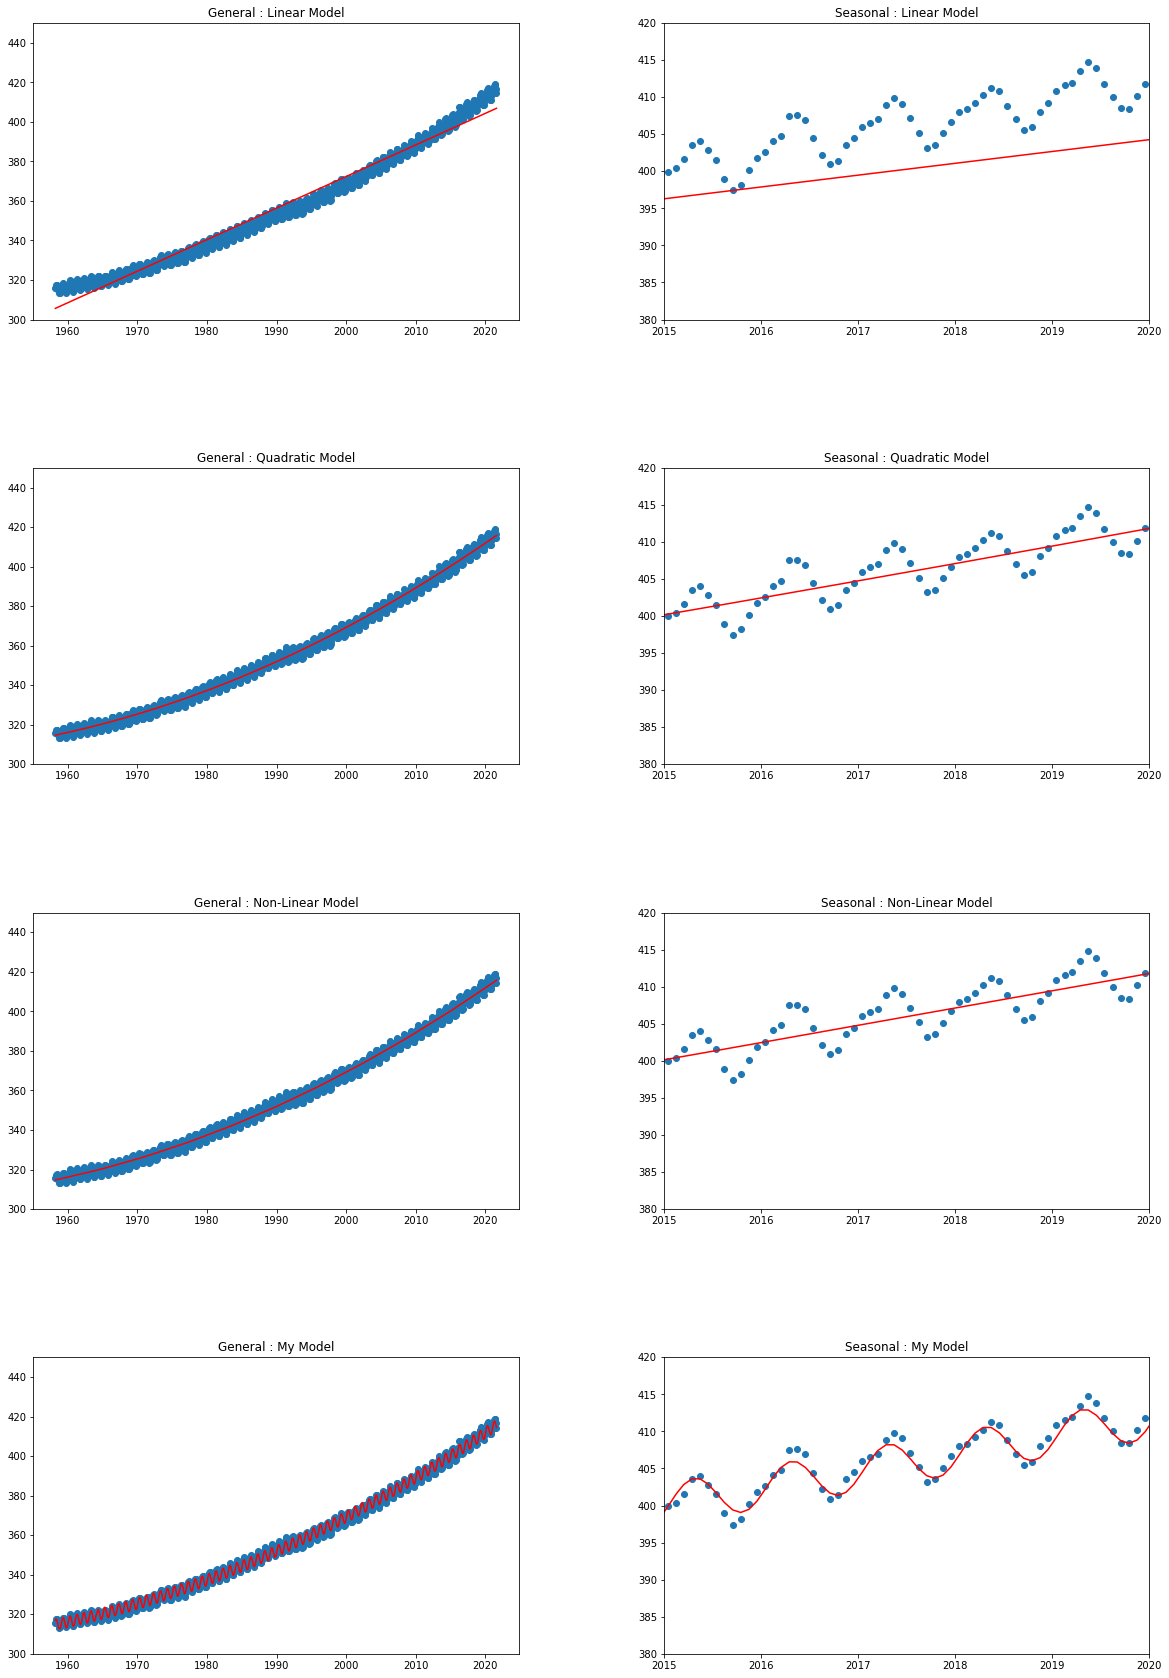

In [24]:
fig, ax = plt.subplots(4,2, figsize = (20,30))

ax[0,0].title.set_text("General : Linear Model")
ax[0,0].scatter(xc,yc)
ax[0,0].set_ylim(300,450)
ax[0,0].plot(xc, linear(xc,pars_lin[0],pars_lin[1]), c = 'r')

ax[0,1].title.set_text("Seasonal : Linear Model")
ax[0,1].scatter(xc,yc)
ax[0,1].set_ylim(380,420)
ax[0,1].set_xlim(2015,2020)
ax[0,1].plot(xc, linear(xc,pars_lin[0],pars_lin[1]), c = 'r')

ax[1,0].title.set_text("General : Quadratic Model")
ax[1,0].scatter(xc,yc)
ax[1,0].set_ylim(300,450)
ax[1,0].plot(xc, quadratic(xc,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r')

ax[1,1].title.set_text("Seasonal : Quadratic Model")
ax[1,1].scatter(xc,yc)
ax[1,1].set_ylim(380,420)
ax[1,1].set_xlim(2015,2020)
ax[1,1].plot(xc, quadratic(xc,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r')

ax[2,0].title.set_text("General : Non-Linear Model")
ax[2,0].scatter(xc,yc)
ax[2,0].set_ylim(300,450)
ax[2,0].plot(xc, nonlinear(xc,pars_nonlin[0],pars_nonlin[1],pars_nonlin[2],pars_nonlin[3],pars_nonlin[4]), c = 'r')

ax[2,1].title.set_text("Seasonal : Non-Linear Model")
ax[2,1].scatter(xc,yc)
ax[2,1].set_ylim(380,420)
ax[2,1].set_xlim(2015,2020)
ax[2,1].plot(xc, nonlinear(xc,pars_nonlin[0],pars_nonlin[1],pars_nonlin[2],pars_nonlin[3],pars_nonlin[4]), c = 'r')

ax[3,0].title.set_text("General : My Model")
ax[3,0].scatter(xc,yc)
ax[3,0].set_ylim(300,450)
ax[3,0].plot(xc, my_model(xc,pars_my[0],pars_my[1],pars_my[2],pars_my[3],pars_my[4]), c = 'r')

ax[3,1].title.set_text("Seasonal : My Model")
ax[3,1].scatter(xc,yc)
ax[3,1].set_ylim(380,420)
ax[3,1].set_xlim(2015,2020)
ax[3,1].plot(xc, my_model(xc,pars_my[0],pars_my[1],pars_my[2],pars_my[3],pars_my[4]), c = 'r')

fig.subplots_adjust(wspace=0.3, hspace=0.5)

- The modification made a good improvement, it captures not only the general trend from 1957 to 2021 but also the seasonal variation

## Part 6

In [25]:
# Make a list of prediction for year 2023 ~ 2027
decimals = x - np.floor(x)
decimals = decimals[0:12]
pred_years = []
for year in range(2023, 2028):
    for i in range(len(decimals)):
        pred_years.append(year+decimals[i])

# Change the data into numpy array
pred_years = np.array(pred_years)
# Make the prediction
pred_co2 = my_model(pred_years,pars_my[0],pars_my[1],pars_my[2],pars_my[3],pars_my[4])

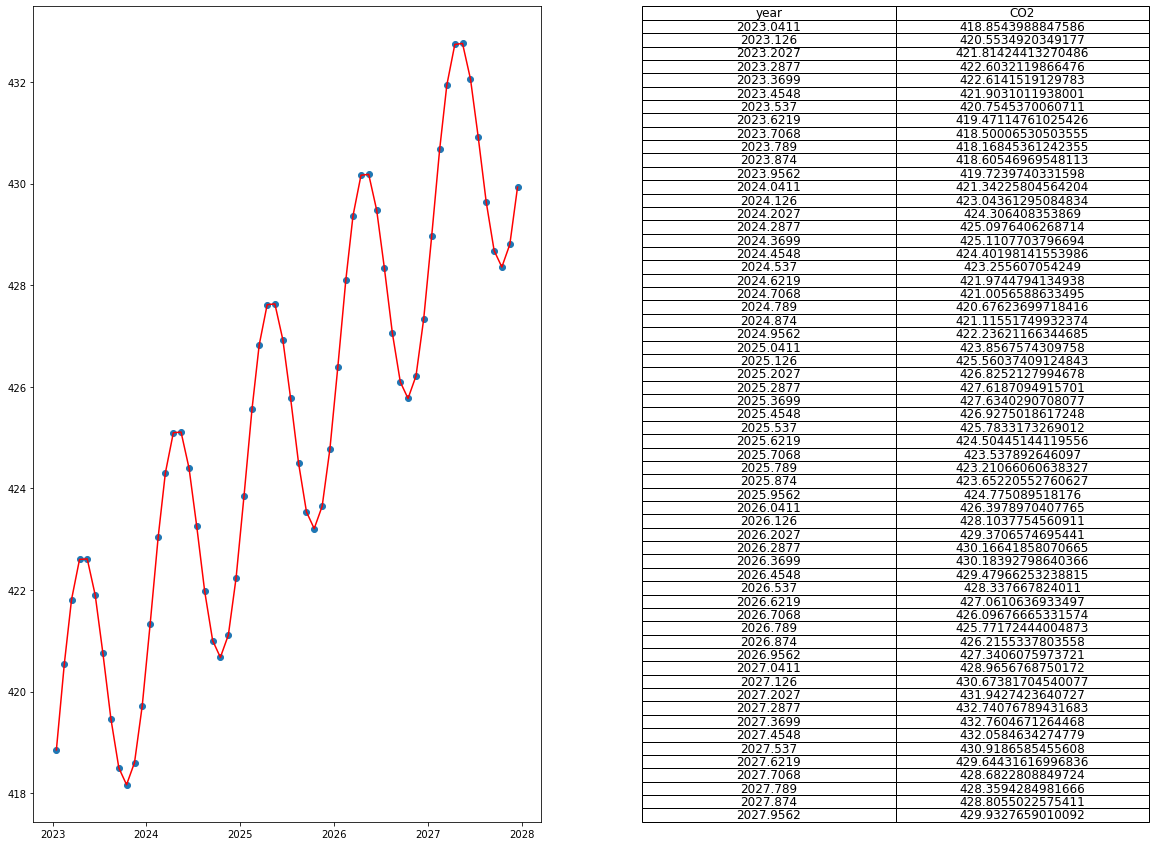

In [26]:
# Plot the prediction with table
pred_years = pred_years.reshape(-1, 1);pred_co2 = pred_co2.reshape(-1,1)
pred = np.concatenate((pred_years, pred_co2), axis = 1)

df = pd.DataFrame(pred, columns = ['year', 'CO2'])

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(121)
ax1.scatter(pred_years, pred_co2)
ax1.plot(pred_years, pred_co2, c = 'r')

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = df.values, rowLabels = None, bbox=bbox, colLabels=df.columns, cellLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)